## Multiple parallel Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_csv = r'C:\Users\rocks\Desktop\nasscom hackathon\warangal.csv'

In [3]:
warangal = pd.read_csv(path_csv, index_col='Dates', parse_dates=True)

In [4]:
warangal.head()

,S02,NOX,PM10,NH3,AQI
Dates,,,,,
Jan-16,7.0,26.0,76,22,76
Feb-16,7.0,19.0,72,21,72
Mar-16,7.1,21.8,63,24,63
Apr-16,7.0,20.0,73,21,73
May-16,8.0,19.0,84,21,84


In [7]:
train = warangal.iloc[:72]

In [5]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [8]:
train = train.to_numpy()

In [9]:
train.shape

(72, 5)

In [10]:
def split_squences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i+n_steps
        if end_ix > len(sequences)-1:
            break
        seq_x , seq_y = sequences[i:end_ix, :], sequences[end_ix, :]   # change here which features to use
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



In [11]:
n_steps = 12
X, y = split_squences(train, n_steps)


In [12]:
X.shape

(60, 12, 5)

In [13]:
n_features = X.shape[2]

In [14]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

In [15]:
model.fit(X, y, epochs=1000)

Epoch 1/1000
2/2 [==============================] - 1s 7ms/step - loss: 3075.3879
Epoch 2/1000
2/2 [==============================] - 0s 5ms/step - loss: 1715.1935
Epoch 3/1000
2/2 [==============================] - 0s 6ms/step - loss: 953.3802
Epoch 4/1000
2/2 [==============================] - 0s 3ms/step - loss: 533.3063
Epoch 5/1000
2/2 [==============================] - 0s 7ms/step - loss: 296.2751
Epoch 6/1000
2/2 [==============================] - 0s 8ms/step - loss: 200.8440
Epoch 7/1000
2/2 [==============================] - 0s 7ms/step - loss: 196.9266
Epoch 8/1000
2/2 [==============================] - 0s 5ms/step - loss: 250.9859
Epoch 9/1000
2/2 [==============================] - 0s 4ms/step - loss: 282.8131
Epoch 10/1000
2/2 [==============================] - 0s 8ms/step - loss: 281.9647
Epoch 11/1000
2/2 [==============================] - 0s 7ms/step - loss: 253.3243
Epoch 12/1000
2/2 [==============================] - 0s 7ms/step - loss: 214.3369
Epoch 13/1000
2/2 [====

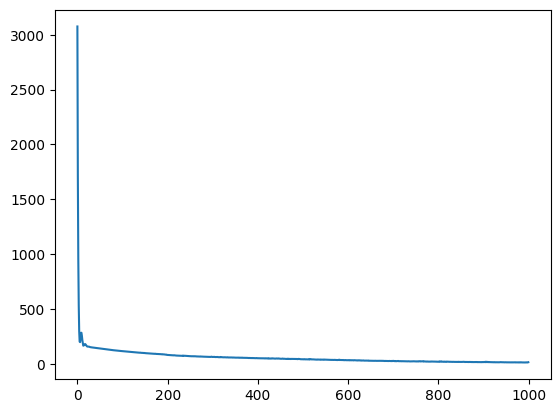

In [16]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [17]:
loss_per_epoch[-1]

13.698145866394043

In [18]:
test= warangal[72:]
test= test.to_numpy()

In [19]:
last_train_batch =train[-12:, :]
last_train_batch = last_train_batch.reshape((1, n_steps, n_features))

In [20]:
list(model.predict(last_train_batch)[0])

1/1 [==============================] - 0s 91ms/step


[3.9218974, 38.601402, 82.422264, 56.343258, 81.059105]

In [21]:
test[0]

array([ 7.1, 31.8, 73. , 36. , 73. ])

In [22]:
last_train_batch

array([[[ 6.4, 42.2, 81. , 71. , 81. ],
        [ 6.9, 47.4, 88. , 69. , 88. ],
        [ 7.7, 36.3, 75. , 41. , 75. ],
        [ 8.9, 34. , 71. , 49. , 71. ],
        [ 8.5, 32. , 45. , 45. , 51. ],
        [ 8. , 30.8, 83. , 43. , 81. ],
        [ 5.8, 28.7, 57. , 46. , 57. ],
        [ 6.8, 32.7, 60. , 42. , 60. ],
        [ 7.3, 31.2, 55. , 44. , 55. ],
        [ 8.1, 32.5, 64. , 45. , 64. ],
        [ 8.3, 34.3, 65. , 37. , 65. ],
        [ 7.3, 31. , 69. , 37. , 69. ]]])

In [23]:
test_predictions=[]

first_eval_batch = train[-12:]
current_batch = first_eval_batch.reshape((1, n_steps, n_features))

for i in range(len(test)):
    current_prediction = list(model.predict(current_batch)[0])
    test_predictions.append(current_prediction)

    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis =1)

1/1 [==============================] - 0s 33ms/step


In [29]:
test_predictions= array(test_predictions)

In [30]:
test_predictions.shape

(12, 5)

In [31]:
test_predictions_aqi= test_predictions[:, 4]

In [32]:
plotting = warangal[72:]
plotting = plotting.drop(['S02', 'NOX', 'PM10', 'NH3'], axis=1)
plotting['Predicted AQI']= test_predictions_aqi

In [33]:
plotting

,AQI,Predicted AQI
Dates,,
Jan-22,73,81.059105
Feb-22,73,77.644821
Mar-22,76,71.787086
Apr-22,60,60.554665
May-22,77,59.740253
Jun-22,85,65.767586
Jul-22,47,47.885868
Aug-22,56,49.001095
Sep-22,48,47.420284


<AxesSubplot: xlabel='Dates'>

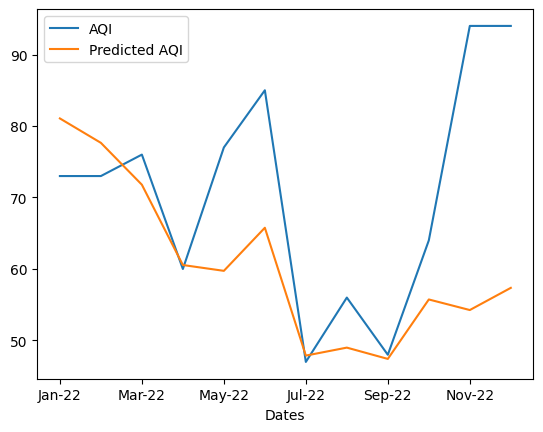

In [34]:
plotting.plot()

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(plotting['AQI'], plotting['Predicted AQI']))
rmse

17.82480017003652

## Seperate Output CNN model

In [14]:
X[0], y[0]

(array([[ 7. , 26. , 76. , 22. , 76. ],
        [ 7. , 19. , 72. , 21. , 72. ],
        [ 7.1, 21.8, 63. , 24. , 63. ],
        [ 7. , 20. , 73. , 21. , 73. ],
        [ 8. , 19. , 84. , 21. , 84. ],
        [ 7. , 22. , 68. , 28. , 68. ],
        [ 7. , 20. , 56. , 24. , 63. ],
        [ 7. , 28. , 36. , 22. , 38. ],
        [ 7. , 20. , 52. , 20. , 52. ],
        [ 7. , 22. , 61. , 22. , 61. ],
        [ 6. , 22. , 83. , 21. , 83. ],
        [ 8. , 30. , 84. , 23. , 84. ]]),
 array([ 8., 25., 76., 22., 76.]))

In [26]:
X.shape

(60, 12, 5)

In [27]:
n_features = X.shape[2]

In [17]:
# seperate output
y1 = y[:, 0].reshape((y.shape[0], 1))
y2 = y[:, 1].reshape((y.shape[0], 1))
y3 = y[:, 2].reshape((y.shape[0], 1))
y4 = y[:, 3].reshape((y.shape[0], 1))
y5 = y[:, 4].reshape((y.shape[0], 1))

In [18]:
from keras.models import Model   
from keras.layers import * 

In [28]:
#define model

visible = Input(shape = (n_steps, n_features))
cnn = Conv1D(filters=64, kernel_size=2, activation='relu')(visible)
cnn = MaxPool1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)


In [29]:
output1 = Dense(1)(cnn)
output2 = Dense(1)(cnn)
output3 = Dense(1)(cnn)
output4 = Dense(1)(cnn)
output5 = Dense(1)(cnn)

In [30]:
model_ = Model(inputs = visible, outputs = [output1, output2, output3, output4, output5] )
model_.compile(optimizer ='adam', loss = 'mse')


In [48]:
model_.fit(X, [y1, y2, y3, y4, y5], epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 0.4132 - dense_10_loss: 0.0275 - dense_11_loss: 0.0872 - dense_12_loss: 0.0522 - dense_13_loss: 0.1694 - dense_14_loss: 0.0769
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 0.3848 - dense_10_loss: 0.0194 - dense_11_loss: 0.0918 - dense_12_loss: 0.0426 - dense_13_loss: 0.1879 - dense_14_loss: 0.0430
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3995 - dense_10_loss: 0.0118 - dense_11_loss: 0.1335 - dense_12_loss: 0.0485 - dense_13_loss: 0.1630 - dense_14_loss: 0.0427
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 0.5382 - dense_10_loss: 0.0110 - dense_11_loss: 0.2138 - dense_12_loss: 0.0360 - dense_13_loss: 0.2049 - dense_14_loss: 0.0724
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3190 - dense_10_loss: 0.0161 - dense_11_loss: 0.0768 - dense_12_loss: 0.1018 - dense_13_loss: 0.0742 - dense_14_loss: 0.0502
Epoch 6

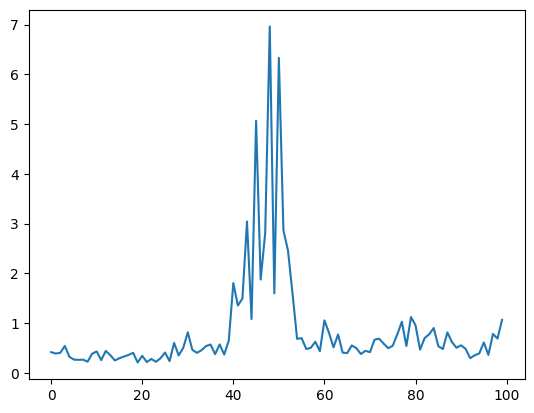

In [49]:

loss_per_epoch = model_.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [43]:
loss_per_epoch[-1]

0.7302208542823792

In [45]:
test= warangal[72:]
test= test.to_numpy()

In [47]:
model_.predict(train[-12:, :])

ValueError: in user code:

    File "c:\Users\rocks\anaconda3\envs\test\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\rocks\anaconda3\envs\test\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\rocks\anaconda3\envs\test\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\rocks\anaconda3\envs\test\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "c:\Users\rocks\anaconda3\envs\test\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\rocks\anaconda3\envs\test\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 12, 5), found shape=(None, 5)


In [46]:
test_predictions=[]

first_eval_batch = train[-12:]
current_batch = first_eval_batch.reshape((1, n_steps, n_features))

for i in range(len(test)):
    current_prediction = list(model_.predict(current_batch)[0])
    test_predictions.append(current_prediction)

    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis =1)

NameError: name 'model' is not defined